# House Prices

## Goal

Using 79 features of homes can you guess the house prices of houses in Ames, Iowa.

## Import Libraries

In [408]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import re
import imageio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import sys
import tarfile
import random
from IPython.display import display, Image
from matplotlib.ticker import MaxNLocator
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

# Set it so it will display all the columns in a pandas dataframe
pd.options.display.max_columns = None

## Read in the Data


In [409]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

datasets = [train_data, test_data]

## Shuffle Up The Training Data

In [410]:
datasets[0] = datasets[0].sample(frac=1)

## Take a peek at the Data

In [411]:
datasets[0].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
610,611,60,RL,NaN,11050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,PosN,Norm,1Fam,2Story,9,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,204.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,904,Unf,0,536,1440,GasA,Ex,Y,SBrkr,1476,677,0,2153,1,0,2,1,3,1,Ex,8,Typ,2,Ex,Attchd,2000.0,Fin,3,736,TA,TA,Y,253,142,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,313000
350,351,120,RL,68.0,7820,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2007,2007,Hip,CompShg,MetalSd,MetalSd,BrkFace,362.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1869,1869,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2007.0,RFn,2,617,TA,TA,Y,210,54,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,318061
456,457,70,RM,34.0,4571,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,5,1916,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,624,624,GasA,Fa,N,SBrkr,624,720,0,1344,0,0,1,0,4,1,TA,7,Typ,0,NaN,Detchd,1916.0,Unf,3,513,Fa,Fa,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml,98000
1327,1328,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,9,1982,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,641,Unf,0,175,816,GasA,Ex,Y,SBrkr,816,0,0,816,0,1,1,0,3,1,Gd,5,Typ,1,Ex,Attchd,1982.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,130500
1139,1140,30,RL,98.0,8731,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,TA,No,BLQ,645,Unf,0,270,915,GasA,TA,Y,SBrkr,1167,0,0,1167,0,0,1,0,3,1,TA,6,Maj1,1,Gd,Detchd,1972.0,Unf,2,495,TA,TA,Y,0,0,216,0,126,0,NaN,NaN,NaN,0,5,2007,WD,Normal,144000


__SalePrice__ is definetly my target variable

In [412]:
datasets[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 610 to 789
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [413]:
# Will describe all the continuous variable.
datasets[0].describe()

# MSSubClass is a hidden categorical variable
# 3Ssn Porch is the "Three season porch area in square feet"
# MiscVal is the value of miscellaneous features
# MoSold is the Month it was sold. 
# YrSold is the Year it was sold

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [414]:
# Look at my categorical varibles. 
datasets[0].describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


This is a list of all the columns that have Null values.

In [415]:
datasets[0].columns[datasets[0].isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

## Fill in missing values of features

This function has the purpose of filling in missing values using the mean of the group by of another variable.

In [416]:
def single_groupby_mean_fix(datasets, group_by_variable, fill_in_variable):
    result_datasets = []

    for dataset in datasets:   
        grouped_mean_values = dataset[[fill_in_variable, group_by_variable]].groupby([group_by_variable]).mean()

        index_and_group_by_variable = dataset[dataset[fill_in_variable].isna()][[group_by_variable]]
        index_and_group_by_variable["NAValue"] = grouped_mean_values.loc[index_and_group_by_variable[group_by_variable]].values
        index_and_group_by_variable.drop([group_by_variable], axis=1, inplace=True)

        join_result = dataset.join(with_dropped_column)
        join_result.loc[join_result[fill_in_variable].isna(), fill_in_variable] = join_result['NAValue']
        join_result.drop("NAValue", axis=1, inplace=True)

        result_datasets.append(join_result)
        
    return result_datasets

This function will let you know what percentage of a values in a column have na values. 

In [417]:
def how_much_na(column_name):
    return datasets[0]["Id"][datasets[0][column_name].isna()].count() / datasets[0].shape[0]

### Lot Frontage

In [418]:
how_much_na('LotFrontage')

0.1773972602739726

In [419]:
group_by_variable = 'Neighborhood'
fill_in_variable = 'LotFrontage'

datasets = single_groupby_mean_fix(datasets, group_by_variable, fill_in_variable)

### Alley

In [420]:
how_much_na('Alley')

0.9376712328767123

In [421]:
datasets[0]["Alley"][datasets[0]["Alley"].isna() == False].head(3)

456    Grvl
829    Pave
747    Pave
Name: Alley, dtype: object

In [422]:
result_datasets = []

for dataset in datasets:
    dataset["Alley"].fillna("Unknown", inplace=True)

### MasVnrType (Masonary Veneer Type)

In [423]:
how_much_na('MasVnrType')

0.005479452054794521

In [424]:
mode = datasets[0]["MasVnrType"][datasets[0]["MasVnrType"].isna() == False].mode()

for dataset in datasets:
    dataset["MasVnrType"].fillna(mode[0], inplace=True)

###  MasVnrArea (Masonary Veneer Area)

In [425]:
how_much_na('MasVnrArea')

0.005479452054794521

In [426]:
for dataset in datasets:
    dataset["MasVnrArea"].fillna(0, inplace=True)

### BsmtQual

In [427]:
how_much_na('BsmtQual')

0.025342465753424658

In [428]:
mode = datasets[0]['BsmtQual'].mode()[0]

for dataset in datasets:
    dataset["BsmtQual"].fillna(mode, inplace=True)

### BsmtCond

In [429]:
how_much_na('BsmtCond')

0.025342465753424658

In [430]:
mode = datasets[0]['BsmtCond'].mode()[0]

for dataset in datasets:
    dataset["BsmtCond"].fillna(mode, inplace=True)

### BsmtExposure

In [431]:
how_much_na("BsmtExposure")

0.026027397260273973

In [432]:
mode = datasets[0]["BsmtExposure"].mode()

for dataset in datasets:
    dataset["BsmtExposure"].fillna(mode[0], inplace=True)

### BsmtFinType1

In [433]:
how_much_na("BsmtFinType1")

0.025342465753424658

In [434]:
mode = datasets[0]["BsmtFinType1"].mode()

for dataset in datasets:
    dataset["BsmtFinType1"].fillna(mode[0], inplace=True)

### BsmtFinType2

In [435]:
how_much_na("BsmtFinType2")

0.026027397260273973

In [436]:
mode = datasets[0]["BsmtFinType2"].mode()

for dataset in datasets:
    dataset["BsmtFinType2"].fillna(mode[0], inplace=True)

### Electrical

In [437]:
how_much_na("Electrical")

0.0006849315068493151

In [438]:
mode = datasets[0]["Electrical"].mode()

for dataset in datasets:
    dataset["Electrical"].fillna(mode[0], inplace=True)

### FireplaceQu

In [439]:
how_much_na("FireplaceQu")

0.4726027397260274

In [440]:
datasets[0][["Fireplaces", "FireplaceQu"]].head()

,Fireplaces,FireplaceQu
610,2,Ex
350,1,Gd
456,0,NaN
1327,1,Ex
1139,1,Gd


In [441]:
datasets[0][datasets[0]["FireplaceQu"].isna()][datasets[0]["Fireplaces"] != 0][["Fireplaces", "FireplaceQu"]].count()

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Fireplaces     0
FireplaceQu    0
dtype: int64

What this tells us is all the fireplaceQu values that are NA are because the house does not actually have a fireplace.

In [442]:
for dataset in datasets:
    dataset["FireplaceQu"].fillna("None", inplace=True)

### GarageType

In [443]:
how_much_na("GarageType")

0.05547945205479452

I personally think that if someone has no Garage Type that means they have no garage. I conclude this becuase if some one has no GarageYrBuilt then they always have an NA GarageType

In [444]:
for dataset in datasets:
    dataset["GarageType"].fillna("NoGarage", inplace=True)
# How do I move index into a column

### GarageYrBlt

In [445]:
how_much_na("GarageYrBlt")

0.05547945205479452

In [446]:
datasets[0][datasets[0]["GarageYrBlt"].isna()][["GarageYrBlt", "GarageType"]].head(5)

,GarageYrBlt,GarageType
582,NaN,NoGarage
1218,NaN,NoGarage
613,NaN,NoGarage
148,NaN,NoGarage
976,NaN,NoGarage


In [447]:
# Set it to some dummy value
for dataset in datasets:
    dataset["GarageYrBlt"].fillna("-1", inplace=True)

### GarageFinish

I am realizing now that __ALL__ of the garage variables are set to None if there is no garage

In [448]:
for dataset in datasets:
    dataset["GarageFinish"].fillna("NoGarage", inplace=True)

### GarageQual

In [449]:
for dataset in datasets:
    dataset["GarageQual"].fillna("NoGarage", inplace=True)

### GarageCond

In [450]:
how_much_na("GarageCond")

0.05547945205479452

In [451]:
for dataset in datasets:
    dataset["GarageCond"].fillna(-1, inplace=True)

### PoolQC

In [452]:
how_much_na("PoolQC")

0.9952054794520548

I'm going to assuming if there is no PoolQC it is because there is actually no pool. This is because of the super high NA value percentage.

In [453]:
for dataset in datasets:
    dataset["PoolQC"].fillna(-1, inplace=True)

### Fence

In [454]:
how_much_na("Fence")

0.8075342465753425

In [455]:
for dataset in datasets:
    dataset["Fence"].fillna("NoFence", inplace=True)

### MiscFeatures

In [456]:
how_much_na("MiscFeature")

0.963013698630137

In [457]:
for dataset in datasets:
    dataset["MiscFeature"].fillna("NoMiscFeature", inplace=True)

### Double Check Everything

In [458]:
datasets[0].columns[datasets[0].isna().any()]

Index([], dtype='object')

Sweet there are no longer any NA values in my dataframe. 

## Check the importance of independent features and Feature Engineering

Let's check some of the basics first.

In [459]:
grouped_mean = datasets[0][["SalePrice", "MSSubClass"]].groupby("MSSubClass").mean()
grouped_count = datasets[0][["SalePrice", "MSSubClass"]].groupby("MSSubClass").count()
grouped_count.columns = ["SalePriceCount"]
grouped_combined = grouped_count.join(grouped_mean)
grouped_combined.sort_values('SalePrice', ascending=False)

,SalePriceCount,SalePrice
MSSubClass,,
60,299,239948.501672
120,87,200779.080460
75,16,192437.500000
20,536,185224.811567
80,58,169736.551724
70,60,166772.416667
40,4,156125.000000
85,20,147810.000000
50,144,143302.972222


In [460]:
datasets[0][["MSZoning", "SalePrice"]].groupby("MSZoning").mean()

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


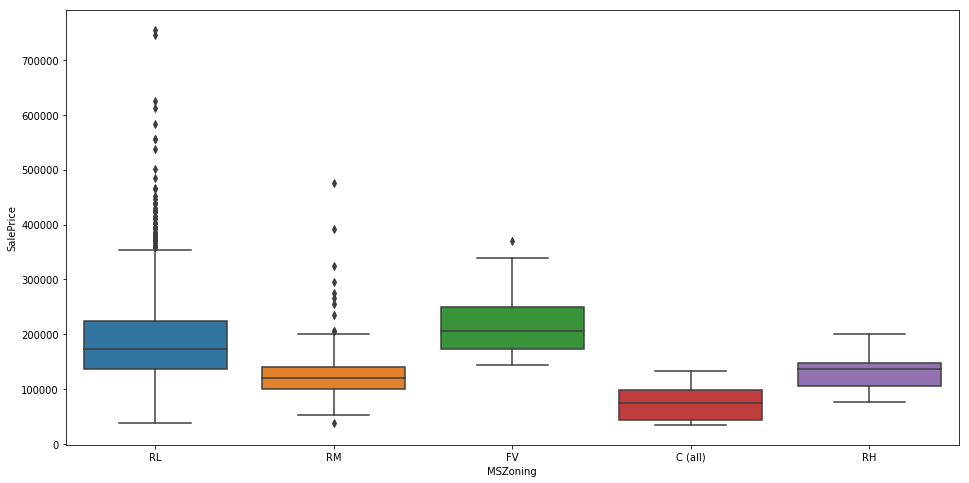

In [461]:
fix, axes = plt.subplots(1, 1, figsize=(16,8))

sns.boxplot(x=datasets[0]["MSZoning"], y=datasets[0]["SalePrice"], ax=axes)

Let's just look at the distribution of the LotFrontage for fun. We can try out some binning techniques.

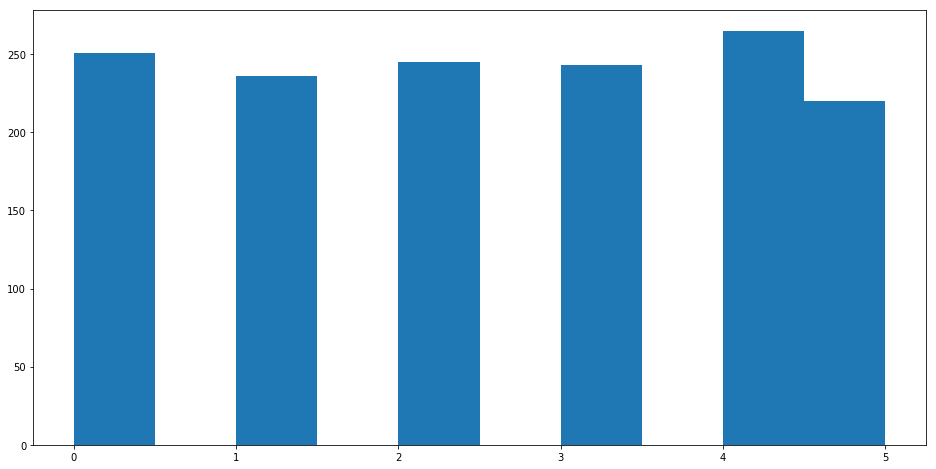

In [477]:
datasets[0]["LotFrontageQBinned"] = pd.qcut(datasets[0]["LotFrontage"], 6)

label = LabelEncoder()
datasets[0]['LotFrontage_Coded'] = label.fit_transform(datasets[0]['LotFrontageQBinned'])

fig, axes = plt.subplots(1, 1, figsize=(16,8))

axes.hist(x=datasets[0]["LotFrontage_Coded"]);

In [466]:
datasets[0].head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageQBinned
610,611,60,RL,71.68254,11050,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,PosN,Norm,1Fam,2Story,9,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,204.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,904,Unf,0,536,1440,GasA,Ex,Y,SBrkr,1476,677,0,2153,1,0,2,1,3,1,Ex,8,Typ,2,Ex,Attchd,2000,Fin,3,736,TA,TA,Y,253,142,0,0,0,0,-1,NoFence,NoMiscFeature,0,5,2009,WD,Normal,313000,"(70.083, 77.0]"
350,351,120,RL,68.00000,7820,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2007,2007,Hip,CompShg,MetalSd,MetalSd,BrkFace,362.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1869,1869,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2007,RFn,2,617,TA,TA,Y,210,54,0,0,0,0,-1,NoFence,NoMiscFeature,0,12,2007,New,Partial,318061,"(62.567, 70.083]"
456,457,70,RM,34.00000,4571,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,5,1916,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,624,624,GasA,Fa,N,SBrkr,624,720,0,1344,0,0,1,0,4,1,TA,7,Typ,0,None,Detchd,1916,Unf,3,513,Fa,Fa,Y,0,0,96,0,0,0,-1,NoFence,NoMiscFeature,0,5,2008,COD,Abnorml,98000,"(20.999, 53.0]"
1327,1328,20,RL,60.00000,6600,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,9,1982,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,641,Unf,0,175,816,GasA,Ex,Y,SBrkr,816,0,0,816,0,1,1,0,3,1,Gd,5,Typ,1,Ex,Attchd,1982,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,-1,MnPrv,NoMiscFeature,0,10,2008,WD,Normal,130500,"(53.0, 62.567]"
1139,1140,30,RL,98.00000,8731,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1920,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,TA,No,BLQ,645,Unf,0,270,915,GasA,TA,Y,SBrkr,1167,0,0,1167,0,0,1,0,3,1,TA,6,Maj1,1,Gd,Detchd,1972,Unf,2,495,TA,TA,Y,0,0,216,0,126,0,-1,NoFence,NoMiscFeature,0,5,2007,WD,Normal,144000,"(85.0, 313.0]"
